In [1]:
import zipfile

from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

face_cascade = cv.CascadeClassifier('../Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')

In [2]:
# Function to extract img_pth from the extrated zip file
def zipextract(pth_zip):
    img_pt = []
    zipf = zipfile.ZipFile(pth_zip)
    for fl in zipf.infolist():
        img_pt.append(zipf.extract(fl))
    return img_pt

img_pt = zipextract('../readonly/Images.zip')

In [3]:
DS = {}#Global Data Structure

def getfaces(img_pt,sclfc,min_N):
    dit = {}
    dit['Faces'] = []
    img = cv.imread(img_pt)
    gr_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gr_img,sclfc,min_N)
    pil_img = Image.open(img_pt).convert('RGB')
    for x,y,w,h in faces:
        cropped_img = pil_img.crop((x,y,w+x,y+h))
        dit['Faces'].append(cropped_img.copy())
    return dit

for img in img_pt: # loding the images in the data structure
    DS[img.split("\\")[-1]] = getfaces(img,1.35,3)

In [4]:
def gettext(img_pt):#Function to extract text
    img = Image.open(img_pt).convert('1')
    return pytesseract.image_to_string(img).replace("\n","")

for img,k in zip(img_pt,sorted(DS.keys(),key = lambda k : (len(k),k))):  # Loading text in the Data Structure
    DS[k]['Text'] = gettext(img)

In [5]:
h = lambda x : (len(x)//5 + 1)*146 if len(x)/5 > len(x)//5 else (len(x)//5)*146

def MakeContentSh(lst): #Function to make the contact_sheet of a given page
    if len(lst) == 0:
        return "But there were no photos in the file"    
    x,y = 0,0
    contact_sheet = Image.new(lst[0].mode,(146*5,h(lst)))
    for img in lst:
        im = img.resize((146,146),Image.BICUBIC)
        contact_sheet.paste(im,(x,y))
        if x+146 == contact_sheet.width:
            x=0
            y=y+146
        else:
            x=x+146
    return(contact_sheet)

In [6]:
def ShowContentSh(kwrd): # Final Funtion to search the word and output the contact_sheet
    for pno in DS.keys():
        if kwrd in DS[pno]['Text']:
            print("Result Found in {}".format(pno))
            display(MakeContentSh(DS[pno]['Faces']))
        else: print("'{}' Not Mentioned in {}".format(kwrd,pno))

'Tuesday' Not Mentioned in Page no-1.PNG
'Tuesday' Not Mentioned in Page no-2.PNG
'Tuesday' Not Mentioned in Page no-3.PNG
'Tuesday' Not Mentioned in Page no-4.PNG
'Tuesday' Not Mentioned in Page no-5.PNG
Result Found in Page no-6.PNG


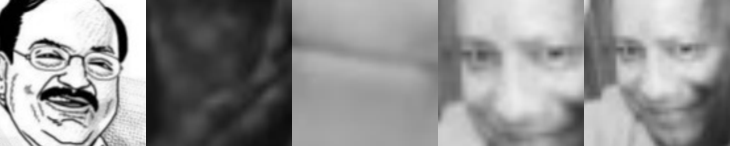

'Tuesday' Not Mentioned in Page no-7.PNG
'Tuesday' Not Mentioned in Page no-8.PNG
'Tuesday' Not Mentioned in Page no-9.PNG
'Tuesday' Not Mentioned in Page no-10.PNG
'Tuesday' Not Mentioned in Page no-11.PNG
'Tuesday' Not Mentioned in Page no-12.PNG
'Tuesday' Not Mentioned in Page no-13.PNG
'Tuesday' Not Mentioned in Page no-14.PNG
'Tuesday' Not Mentioned in Page no-15.PNG
Result Found in Page no-16.PNG


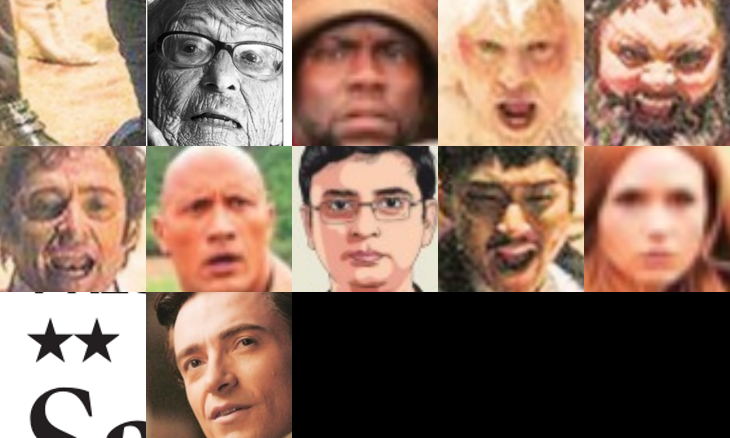

Result Found in Page no-17.PNG


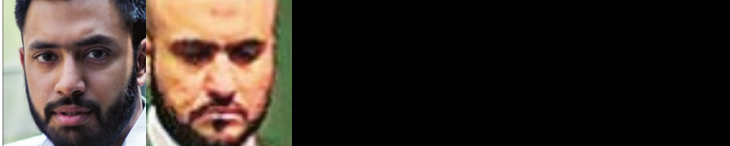

In [8]:
ShowContentSh('Tuesday')

'Death' Not Mentioned in Page no-1.PNG
'Death' Not Mentioned in Page no-2.PNG
'Death' Not Mentioned in Page no-3.PNG
'Death' Not Mentioned in Page no-4.PNG
'Death' Not Mentioned in Page no-5.PNG
'Death' Not Mentioned in Page no-6.PNG
Result Found in Page no-7.PNG


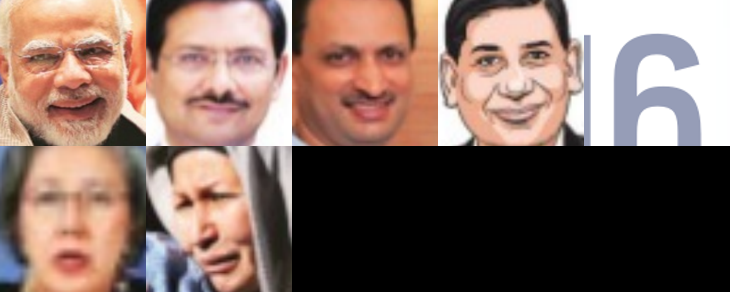

'Death' Not Mentioned in Page no-8.PNG
'Death' Not Mentioned in Page no-9.PNG
'Death' Not Mentioned in Page no-10.PNG
'Death' Not Mentioned in Page no-11.PNG
'Death' Not Mentioned in Page no-12.PNG
'Death' Not Mentioned in Page no-13.PNG
'Death' Not Mentioned in Page no-14.PNG
'Death' Not Mentioned in Page no-15.PNG
'Death' Not Mentioned in Page no-16.PNG
'Death' Not Mentioned in Page no-17.PNG


In [9]:
ShowContentSh('Death')

'night' Not Mentioned in Page no-1.PNG
'night' Not Mentioned in Page no-2.PNG
'night' Not Mentioned in Page no-3.PNG
'night' Not Mentioned in Page no-4.PNG
'night' Not Mentioned in Page no-5.PNG
Result Found in Page no-6.PNG


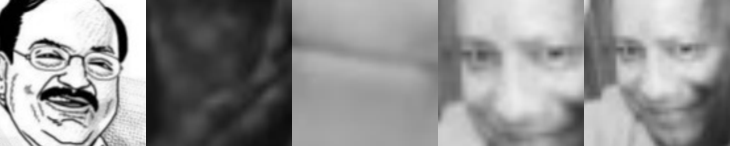

'night' Not Mentioned in Page no-7.PNG
Result Found in Page no-8.PNG


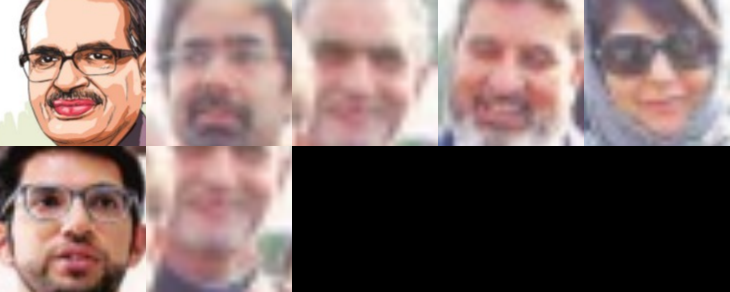

Result Found in Page no-9.PNG


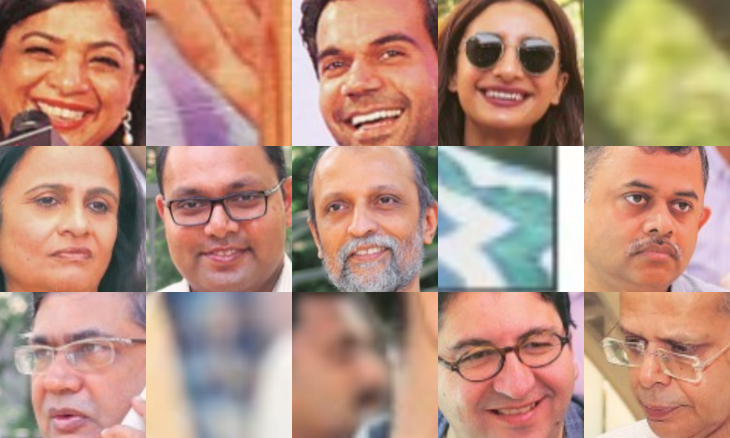

'night' Not Mentioned in Page no-10.PNG
Result Found in Page no-11.PNG


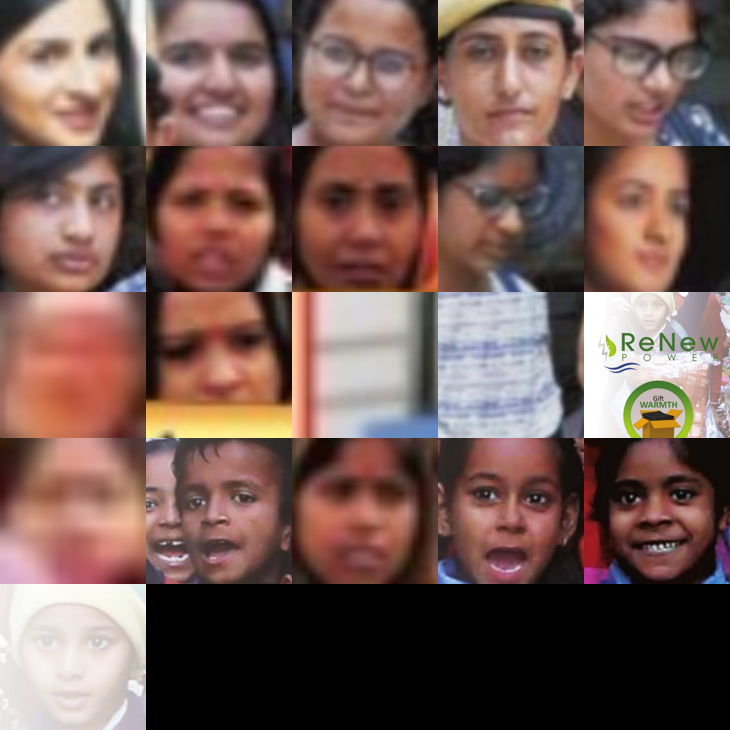

Result Found in Page no-12.PNG


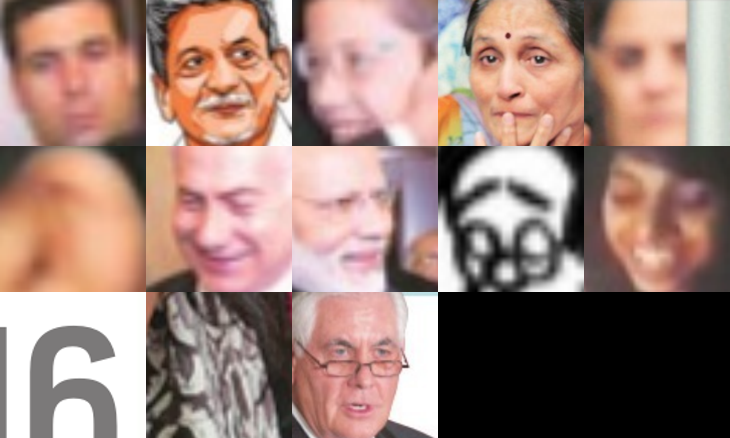

Result Found in Page no-13.PNG


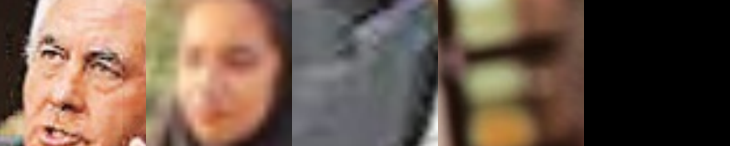

'night' Not Mentioned in Page no-14.PNG
Result Found in Page no-15.PNG


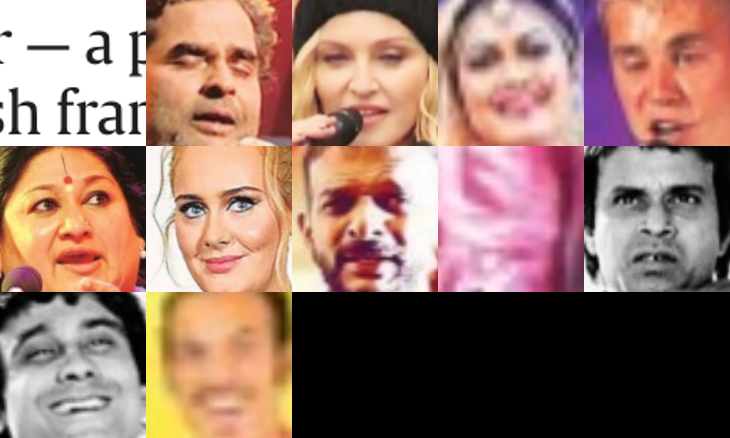

'night' Not Mentioned in Page no-16.PNG
Result Found in Page no-17.PNG


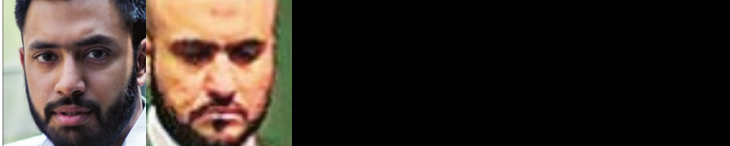

In [10]:
ShowContentSh('night')

Result Found in Page no-1.PNG


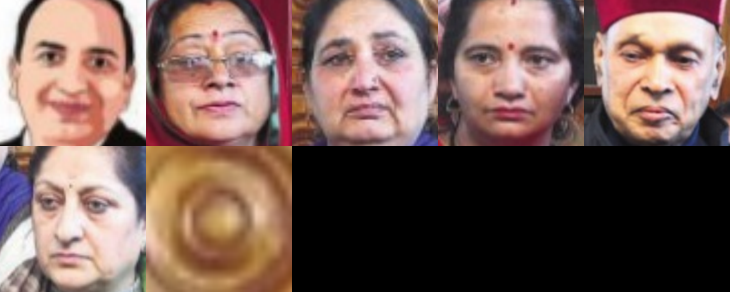

Result Found in Page no-2.PNG


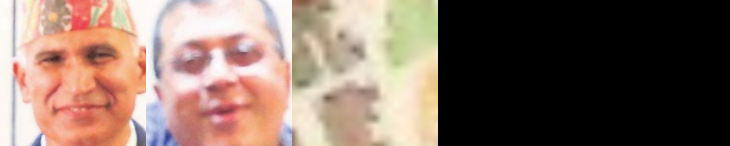

Result Found in Page no-3.PNG


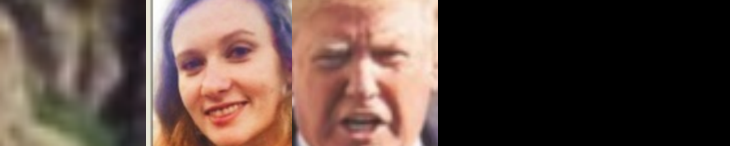

Result Found in Page no-4.PNG


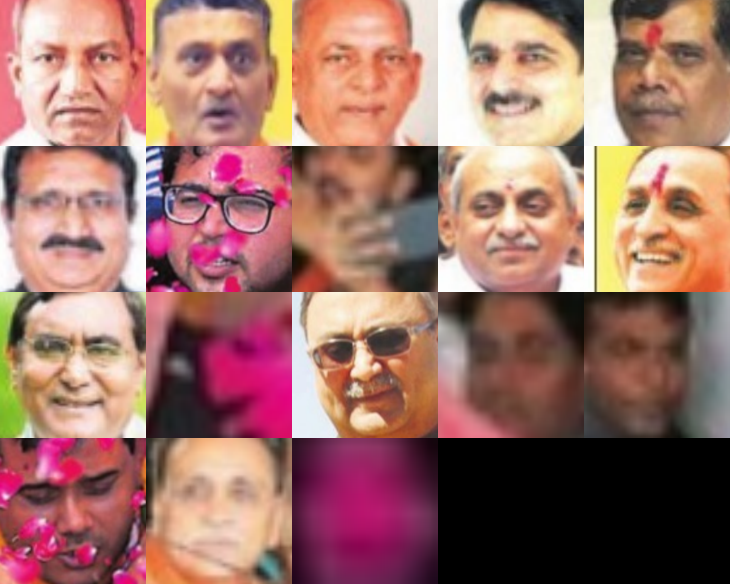

Result Found in Page no-5.PNG


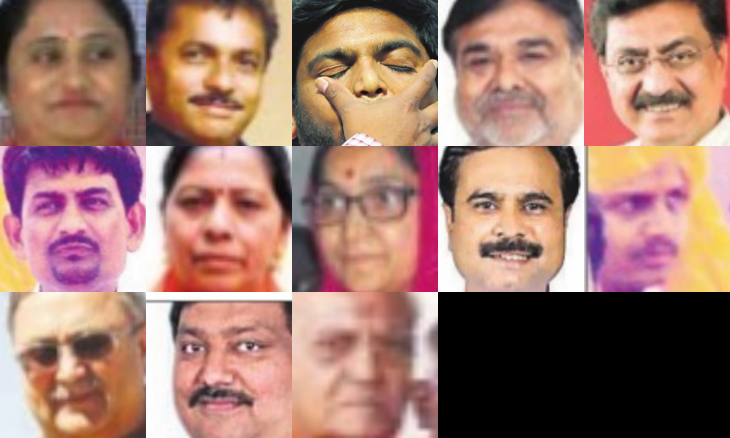

Result Found in Page no-6.PNG


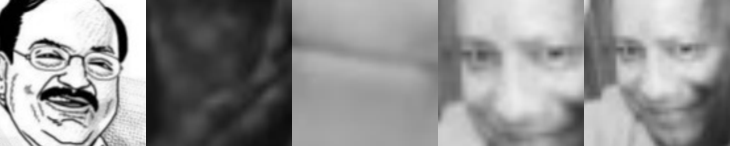

Result Found in Page no-7.PNG


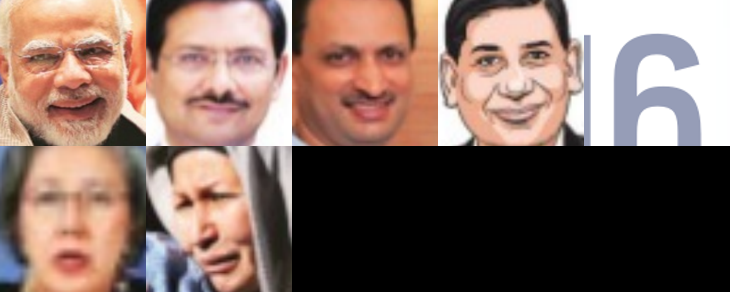

Result Found in Page no-8.PNG


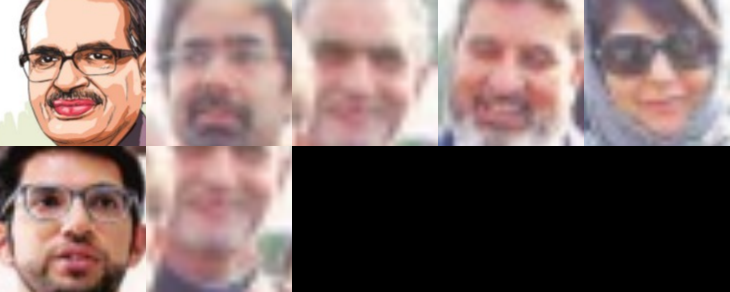

Result Found in Page no-9.PNG


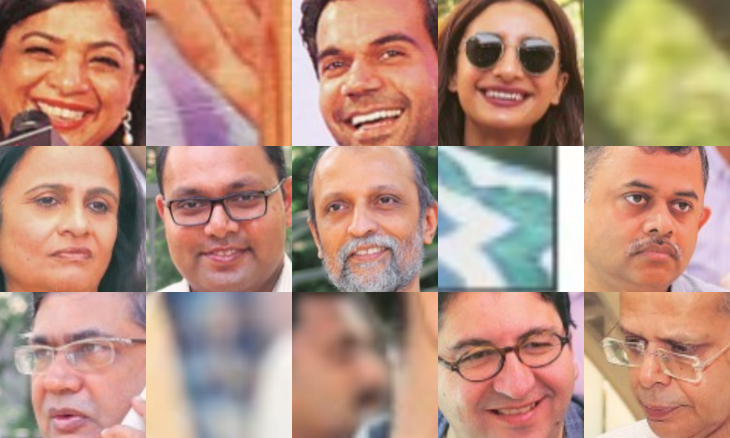

Result Found in Page no-10.PNG


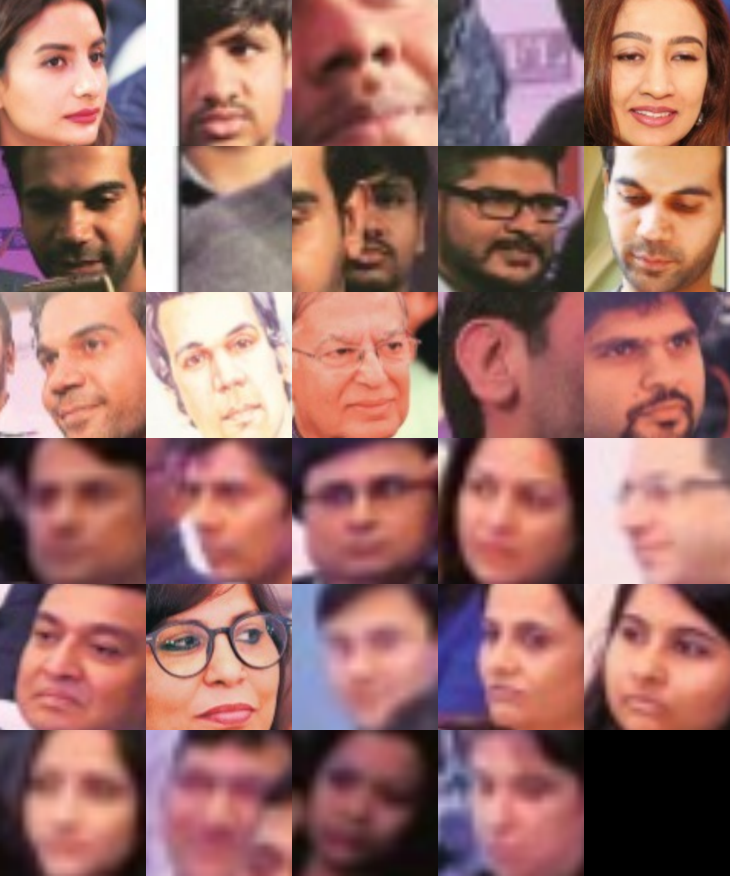

Result Found in Page no-11.PNG


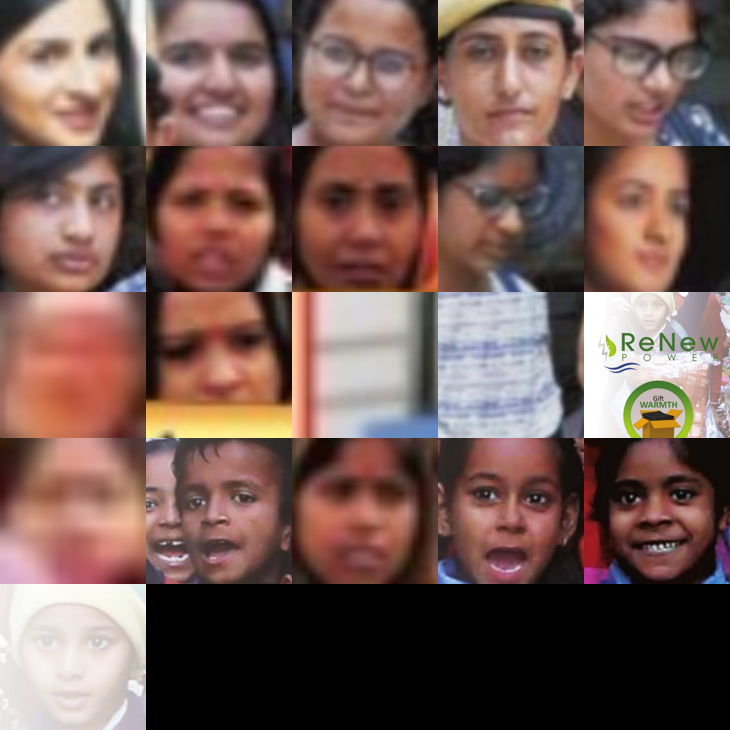

Result Found in Page no-12.PNG


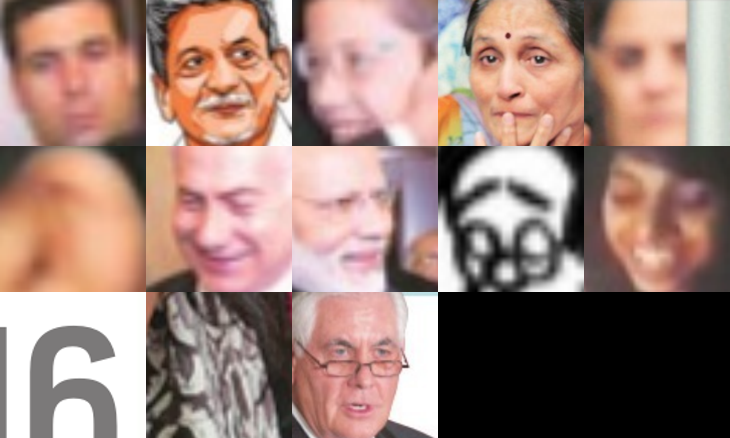

Result Found in Page no-13.PNG


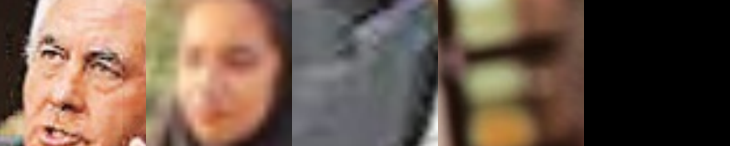

Result Found in Page no-14.PNG


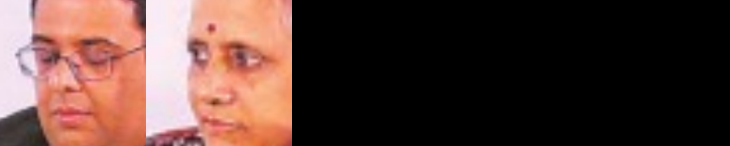

Result Found in Page no-15.PNG


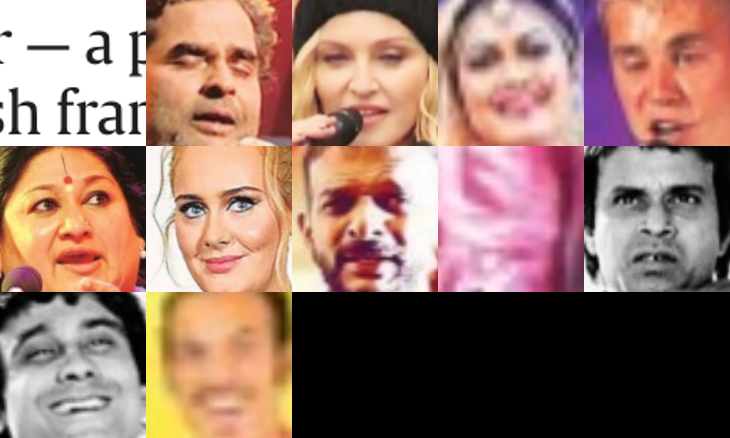

Result Found in Page no-16.PNG


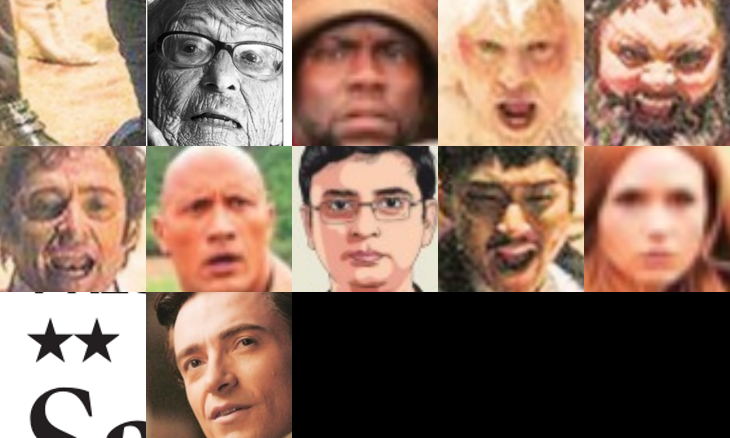

Result Found in Page no-17.PNG


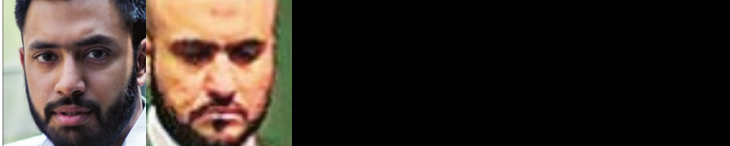

In [11]:
ShowContentSh('war')